In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='w'

In [2]:
#acceleration function for the driven damped harmonic oscillator
def acc(x, v, F): 
    return ((-gamma*v) - ((k/m)*x) + F)

In [3]:
#defining our numerical RK4 method to compute position and velocity at every time-step

def rk4(X0, V0, Tf, dt, F): #X0=initial position, V0=initial velocity
    N = int(Tf/dt) #Tf=Final time, dt=time step
    X = np.zeros(N+1, float)
    V = np.zeros(N+1, float)
    T = np.zeros(N+1, float)
    
    X[0] = X0
    V[0] = V0
    
    for n in range (1, N+1):
        T[n] = n*dt
        x0 = X[n-1]
        v0 = V[n-1]
        h = dt
        
        k1x = v0
        k1v = acc(x0, v0, F[n-1])
        k2x = v0 + (k1v*h/2)
        k2v = acc((x0 + (k1x*h/2)), (v0 + (k1v*h/2)), F[n-1])
        k3x = v0 + (k2v*h/2)
        k3v = acc((x0 + (k2x*h/2)), (v0 + (k2v*h/2)), F[n-1])
        k4x = v0 + (k3v*h)
        k4v = acc(x0 + (k3x*h), v0 + (k3v*h), F[n-1])
        
        X[n] = x0 + (dt*(k1x + 2*k2x + 2*k3x + k4x)/6)
        V[n] = v0 + (dt*(k1v + 2*k2v + 2*k3v + k4v)/6)
    
    return T, X, V

In [4]:
Fgauss = np.random.normal(1, 0.1, size = 1000000)#gaussian randomness
Funi = np.random.uniform(size = 10000)#uniform randomness

## Checking eqn 33

In [11]:
##Overdamped Case
%%time
#Calculating averages: Gaussian

trials = 1000
k = 1# spring constant
m = 1#mass
gamma = 3#damping constant
Final = 50
dt = 0.1
N = int(Final/dt) +1
#2-D arrays
X_val = np.zeros(shape=(trials, N))
Xsqr_val = np.zeros(shape=(trials, N))
V_val = np.zeros(shape=(trials, N))
Vsqr_val = np.zeros(shape=(trials, N))

for i in range (0, trials):
    F = np.random.normal(0, 1, size = N)
    tr, xr, vr = rk4(0, 1, Final, dt, F)
    X_val[i] = xr
    V_val[i] = vr
    Xsqr_val[i] = np.square(xr)
    Vsqr_val[i] = np.square(vr)
    C = np.multiply(vr, F)
    
X_avg = np.sum(X_val, axis=0) / trials
Xsqr_avg = np.sum(Xsqr_val, axis=0) / trials
V_avg = np.sum(V_val, axis=0) / trials
Vsqr_avg = np.sum(Vsqr_val, axis=0) / trials
C = np.sum(C, axis=0) / trials

Wall time: 3.93 s


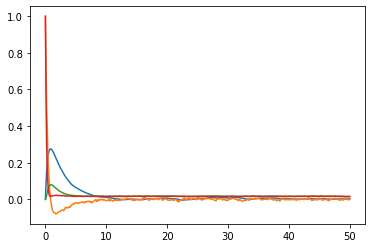

In [12]:
plt.plot(tr, X_avg)
plt.plot(tr, V_avg)
plt.plot(tr, Xsqr_avg)
plt.plot(tr, Vsqr_avg)
plt.show()

0.01741267504818731 0.01660656511301223


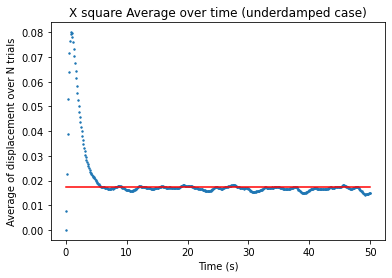

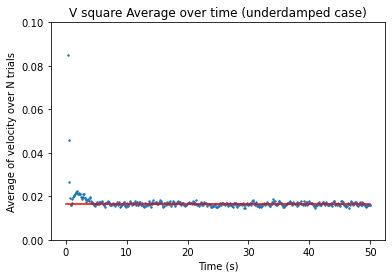

In [13]:
avg_1 = np.sum(Xsqr_avg[25:], axis=0)/len(Xsqr_avg[25:])
avg_2 = np.sum(Vsqr_avg[25:], axis=0)/len(Vsqr_avg[25:])

print(avg_1, avg_2)

plt.scatter(tr, Xsqr_avg, s=2)
plt.plot(tr, avg_1*(tr**0), color='red')
plt.title("X square Average over time (underdamped case)")
plt.xlabel("Time (s)")
plt.ylabel("Average of displacement over N trials")
plt.show()

# plt.scatter(tr, V_avg, s=2)
# plt.title("V Average over time")
# plt.show()

plt.scatter(tr, Vsqr_avg, s=2)
plt.plot(tr, avg_2*(tr**0), color='red')
plt.title("V square Average over time (underdamped case)")
plt.xlabel("Time (s)")
plt.ylabel("Average of velocity over N trials")
plt.ylim(0, 0.1)
plt.show()

$$ \text{Equation 26} $$

$$\frac{d^2\sigma_x^2}{dt^2} + \beta\frac{d\sigma_x^2}{dt} + 2\omega^2\sigma_x^2 = 2\frac{k_B T}{m}$$

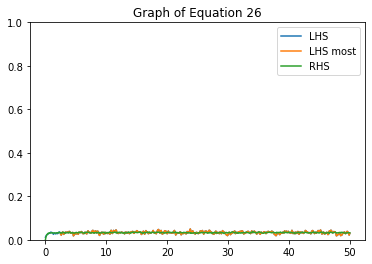

k_b*T/m =  0.016620786890588442
0.03302624421911374


In [14]:
#Equation 26- Numerical calculating the standard deviation and its derivatives, to obtain a value of KbT/m

var = Xsqr_avg - np.square(X_avg)
var_v = Vsqr_avg - np.square(V_avg)

dx = np.zeros(len(var), float)
ddx = np.zeros(len(var), float)

for i in range (1, len(var)):
    dx[i-1] = (var[i] - var[i-1])/dt
    
for i in range(1, len(dx)):
    ddx[i-1] = (dx[i] - dx[i-1])/dt
    
eqn = ddx + gamma*dx + 2*(k/m)*var
usable = eqn[25:]
tr_usable = tr[25:]

plt.plot(tr, eqn, label="LHS")
plt.plot(tr_usable, usable, label="LHS most")
plt.plot(tr, 2*var_v, label="RHS")
plt.ylim(0, 1)
plt.legend()
plt.title("Graph of Equation 26")
plt.show()


avg1 = np.sum(eqn, axis=0)/len(eqn)
avg2 = np.sum(2*var_v, axis=0)/len(var_v)
avg3 = np.sum(usable, axis=0)/len(usable)

print("k_b*T/m = ", avg3/2)
print(avg1)

$$ \text{Equation 33} $$

$$\bar{\beta}_1 = \sqrt{\beta^2 - 8\omega^2} $$

$$\langle x^2(t)\rangle_o = \langle x(t)\rangle^2 + \frac{k_B T}{m\omega^2} \Bigl\{ 1- e^{-\frac{1}{2}\beta t} \Bigl( 2\sinh^2{\frac{1}{4}\bar{\beta}_1 t} + \frac{\beta}{\bar{\beta}_1}\sinh{\frac{1}{2}\bar{\beta}_1 t} + 1 \Bigr) \Bigr\}$$

$$ \text{Equation 35} $$

$$\beta_1 = \sqrt{\beta^2 - 4\omega^2} $$

$$\langle x^2(t)\rangle_c = \langle x(t)\rangle^2 + \frac{k_B T}{m\omega^2} \Bigl\{ 1- e^{-\beta t} \Bigl( 2\frac{\beta^2}{\beta_1^2} \sinh^2{\frac{1}{2}\beta_1 t} + \frac{\beta}{\beta_1}\sinh{\beta_1 t} + 1 \Bigr) \Bigr\}$$

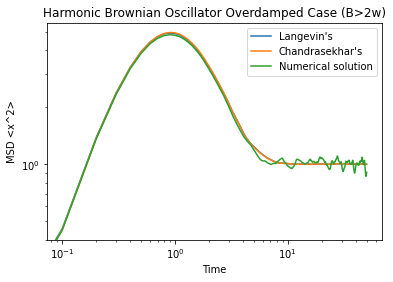

2.23606797749979


In [15]:
#Equation 33 and 35- comparing the numerical integration with langevin's(33) and chandrashekahar's(35) analytical solutions for MSD
#The overdamped case, where gamma > 2*omega

x_sqr = np.square(X_avg)
beta = gamma
omega=np.sqrt(k/m)#angular frequency
beta1=np.sqrt(beta**2 - (8*(omega**2)))
y=(avg3)/(2*(omega**2))#KT/m*w^2

betaa1=np.sqrt(beta**2 - (4*(omega**2)))

A = x_sqr
B = np.exp(-0.5*beta*tr)
C = (2*(np.sinh(0.25*beta1*tr)**2)) + ((beta/beta1)*np.sinh(0.5*beta1*tr)) + 1

#xfunction1 = x_sqr + y*(1 - (np.exp(-beta*tr/2))*((2*np.sinh(beta1*tr/4)**2) + ((beta/beta1)*np.sinh(beta1*tr/2)) + 1))
xfunction1 = A + y*(1- B*C)
xfunction2 = x_sqr + y*(1 - (np.exp(-beta*tr))*((2*(beta**2/betaa1**2)*np.sinh(betaa1*tr/2)**2) + ((beta/beta1)*np.sinh(beta1*tr)) + 1))
xfunction3 = Xsqr_avg
#normalizing by y
xfunction4 = xfunction1/y
xfunction5 = xfunction2/y
xfunction6 = xfunction3/y

diff = xfunction1 - xfunction2
# xaxis=np.log10(tr[1:])
# yaxis1=np.log10(xfunction4[1:])
# yaxis2=np.log10(xfunction5[1:])
# yaxis3=np.log10(xfunction6[1:])

plt.plot(tr, xfunction4, label="Langevin's")
plt.plot(tr, xfunction5, label="Chandrasekhar's")
plt.plot(tr, xfunction6, label="Numerical solution")
# plt.plot(tr, diff)

plt.ylabel('MSD <x^2>')
plt.xlabel('Time')
plt.legend()
plt.title('Harmonic Brownian Oscillator Overdamped Case (B>2w)')
plt.yscale("log")
plt.xscale("log")
plt.show()

print(betaa1)

$$ \text{Equation 50} $$

$$ \langle v^2(t)\rangle_o = \langle v(t)\rangle^2 + \Bigl( \sigma_0^2 - \frac{k_B T \omega^2}{m (\omega^2 + \beta^2)} \Bigr) e^{-2 \beta t} + \frac{k_B T \omega^2}{m (\omega^2 + \beta^2)}e^{-\frac{1}{2}\beta t} \times \Bigl[ 2\sinh^2{\frac{1}{4}\bar{\beta}_1 t} - \frac{3 \beta}{\bar{\beta}_1}\sinh{\frac{1}{2}\bar{\beta}_1 t} \Bigr] + \frac{C_1}{\beta m} \Bigl( 1- e^{-\frac{1}{2} \beta t}\Bigr)$$


$$ \text{Equation 52} $$

$$\beta_1 = \sqrt{\beta^2 - 4\omega^2} $$

$$\langle v^2(t)\rangle_c = \langle v(t)\rangle^2 + \frac{k_B T}{m} \Bigl\{ 1- e^{-\beta t} \Bigl( 2\frac{\beta^2}{\beta_1^2} \sinh^2{\frac{1}{2}\beta_1 t} - \frac{\beta}{\beta_1}\sinh{\beta_1 t} + 1 \Bigr) \Bigr\}$$

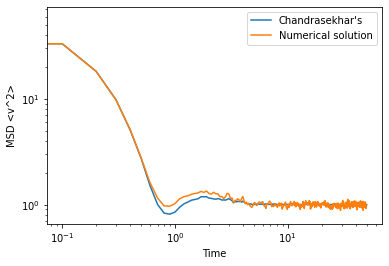

In [16]:
#Equation 50 and 52- comparing the numerical integration with langevin's(50) and chandrashekahar's(52) analytical solutions for MSV
#The overdamped case, where gamma > 2*omega


v_sqr = np.square(V_avg)
beta=gamma
omega=np.sqrt(k/m)# angular frequency

C=(avg3/2)#KT/m*w^2

betaa1=np.sqrt(beta**2 - (4*(omega**2)))
vo=1
xo=0
sigma=(Vsqr_avg-v_sqr)**2
alpha=1
beta_1=np.sqrt(beta**2-8*omega**2)

vt=vo*np.exp(-0.5*beta*tr)*(np.cosh(0.5*betaa1*tr)-(beta/betaa1)*np.sinh(0.5*betaa1*tr))-(2*xo*omega**2*np.exp(-0.5*beta*tr)*np.sinh(0.5*betaa1*tr)/betaa1)

v_function2 = v_sqr + C*(1 - (np.exp(-beta*tr))*((2*(beta**2/betaa1**2)*np.sinh(betaa1*tr/2)**2) - ((beta/beta1)*np.sinh(beta1*tr)) + 1))
v_function3 = Vsqr_avg
v_function5 = v_function2/C
v_function6 = v_function3/C
langevin=vt**2+np.exp(-2*beta*tr)*(sigma-C/beta**2)+((C/beta**2)*np.exp(-0.5*beta*tr))*(2*(np.sinh(0.25*beta_1*tr)**2)-(3*beta*np.sinh(0.5*beta_1*tr)/beta_1)+1)+(alpha/beta)*C*(1-np.exp(-0.5*beta*tr))
# x_axis=np.log10(tr[1:])
# #y_axis1=np.log10(v_function4[1:])
# y_axis2=np.log10(v_function5[1:])
# y_axis3 = np.log10(v_function6[1:])

# plt.plot(tr, langevin, label="Langevin's")
plt.plot(tr, v_function5, label="Chandrasekhar's")
plt.plot(tr, v_function6, label="Numerical solution")
# %matplotlib
plt.ylabel('MSD <v^2>')
plt.xlabel('Time')
plt.legend()
# plt.title('Harmonic Brownian Oscillator Overdamped Case (B>2w)')
plt.yscale("log")
plt.xscale("log")
plt.show()